In [68]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np


# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [43]:
# your-code

act_pretest = pd.read_csv('data/activity_pretest.csv')
act_pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860000 entries, 0 to 1859999
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   activity_level  int64 
dtypes: int64(1), object(2)
memory usage: 42.6+ MB


In [44]:
act_pretest.isnull().sum()

userid            0
dt                0
activity_level    0
dtype: int64

In [45]:
act_pretest

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [46]:
# activity levels
act_pretest['activity_level'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [47]:
# users per activity level
act_pretest.groupby(['activity_level'])['userid'].count()

activity_level
0     909125
1      48732
2      49074
3      48659
4      48556
5      49227
6      48901
7      48339
8      48396
9      48820
10     48943
11     48832
12     48911
13     48534
14     48620
15     48599
16     48934
17     48395
18     48982
19     48901
20     24520
Name: userid, dtype: int64

In [48]:
# remove activity_level = 0 (no activity)
act_pretest_real = act_pretest.loc[act_pretest['activity_level'] != 0]
act_pretest_real

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [53]:
# records per per day
act_pretest_day = pd.DataFrame(act_pretest_real.groupby(['dt'])['userid'].count()).reset_index()
act_pretest_day

,dt,userid
0,2021-10-01,30634
1,2021-10-02,30775
2,2021-10-03,30785
3,2021-10-04,30599
4,2021-10-05,30588
5,2021-10-06,30639
6,2021-10-07,30637
7,2021-10-08,30600
8,2021-10-09,30902
9,2021-10-10,30581


In [54]:
# records per activity levels per day
act_pretest_day = pd.DataFrame(act_pretest_real.groupby(['dt', 'activity_level'])['userid'].count()).reset_index()
act_pretest_day

,dt,activity_level,userid
0,2021-10-01,1,1602
1,2021-10-01,2,1507
2,2021-10-01,3,1587
3,2021-10-01,4,1551
4,2021-10-01,5,1586
...,...,...,...
615,2021-10-31,16,1499
616,2021-10-31,17,1534
617,2021-10-31,18,1531
618,2021-10-31,19,1616


In [78]:
act_pretest_real.describe()

,activity_level
count,950875.000000
mean,10.256362
std,5.635938
min,1.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


In [89]:
act_pretest_day.loc[act_pretest_day['dt'] == '2021-10-01'].describe()

,activity_level,userid
count,20.00000,20.000000
mean,10.50000,1531.700000
std,5.91608,184.153854
min,1.00000,769.000000
25%,5.75000,1540.250000
50%,10.50000,1574.000000
75%,15.25000,1594.000000
max,20.00000,1640.000000


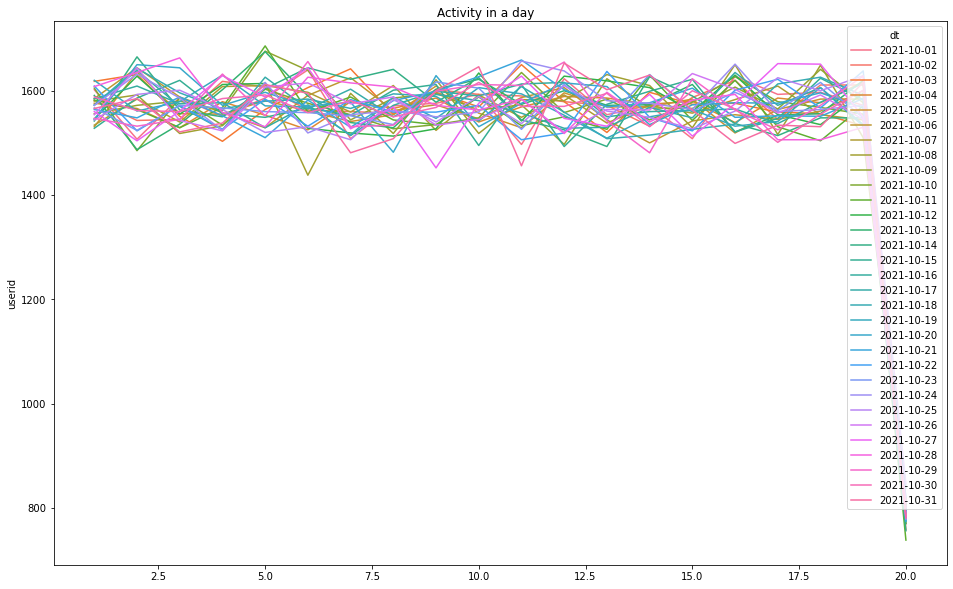

In [86]:
fig, ax = plt.subplots(ncols=1,
                        nrows=1,
                        figsize=(16, 10))

fig.suptitle('Activity in a day', y=0.9) 

#sns.lineplot(data=act_pretest_day.loc[act_pretest_day['dt'] == '2021-10-01'], 
sns.lineplot(data=act_pretest_day, 
             x='activity_level', 
             y='userid',
             hue='dt').set(xlabel='')

plt.show()


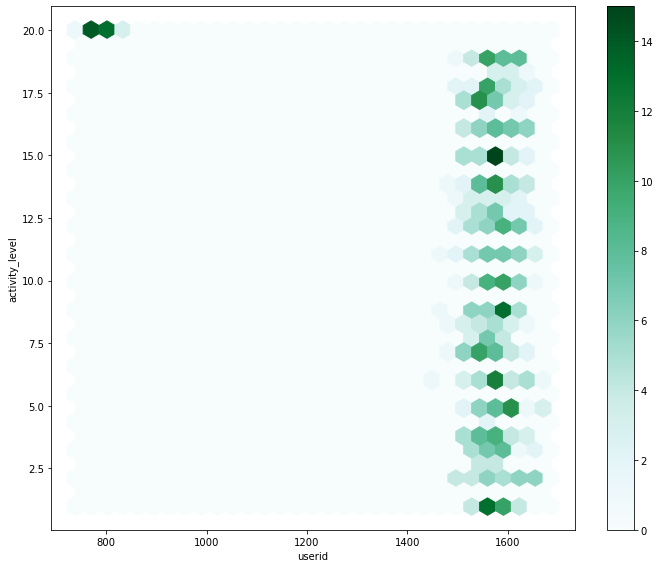

In [83]:

ax = act_pretest_day.plot.hexbin(x='userid', 
                                 y='activity_level',
                                 gridsize=30,
                                 sharex=False,     
                                 figsize=(10, 8))
ax.set_xlabel('userid')
ax.set_ylabel('activity_level')
plt.tight_layout()

### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testinG.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [5]:
# your-code




### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [6]:
# your-code




---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [ ]:
# your-code




---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [7]:
# your-code




---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

In [8]:
# your-conclusions




---